# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 * This problem is important to solve because reducing the loan default rate will net more profits for the company and reduce the overal strain on the US financial system from subprime borrowers. 

### **The objective:**

 - What is the intended goal?
 * To reduce the loan default rate.

### **The key questions:**

- What are the key questions that need to be answered?
* What input variables are the best predictors of an individuals likelihood to default on a loan.

### **The problem formulation**:

- What is it that we are trying to solve using data science?
* We are trying to predict who is likely to default on their loan given the variables listed below. 

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

#### Reading the dataset

In [195]:
hm=pd.read_csv("hmeq.csv")
data=hm.copy()

#### Understanding the shape of the dataset

In [196]:
data.shape

(5960, 13)

#### Checking the data types

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


#### Checking for missing values

In [199]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

#### Checking for duplicated values

In [200]:
data.duplicated().sum()

0

## Summary Statistics

In [201]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


- The mean values for MORTDUE, VALUE, and DEBTINC are greater than the median, suggesting that the distributions of these variables may be positively skewed.
- The mean number of derogatory reports and delinquent credit lines are relatively low.
- while the mean age of the oldest credit line is relatively high.
- MORTDUE and VALUE have relatively large variances.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


#### What is the range of values for the loan amount variable "LOAN"?

In [202]:
data.LOAN.describe()

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

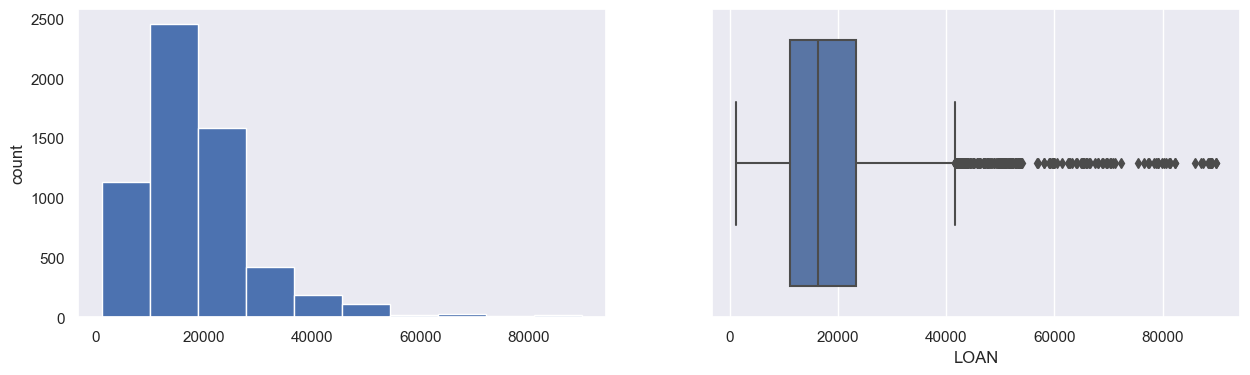

In [203]:
for col in ['LOAN']:
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

- Loan values range from 1100 to 89900 and there is a positive skew, we also see that there are a lot of outliers above 23300

#### How does the distribution of years at present job "YOJ" vary across the dataset?

In [204]:
data.YOJ.describe()

count    5445.000000
mean        8.922268
std         7.573982
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        41.000000
Name: YOJ, dtype: float64

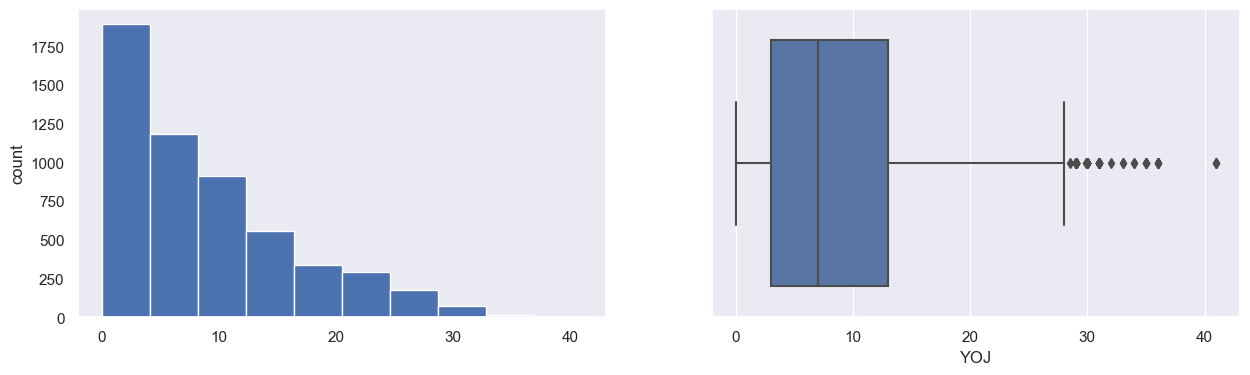

In [205]:
for col in ['YOJ']:
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

- There seems to be a high concentration of lower years spent at a job, with the count decreasing as years increase. This is expected as it is less common that someone has been at a job for a very long time. 

#### How many unique categories are there in the REASON variable?

In [206]:
data.REASON.describe()

count        5708
unique          2
top       DebtCon
freq         3928
Name: REASON, dtype: object

In [207]:
data.REASON.unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

- 2 unique categories; HomeImp and DebtCon

#### What is the most common category in the JOB variable?

In [208]:
data.JOB.describe()

count      5681
unique        6
top       Other
freq       2388
Name: JOB, dtype: object

- The most common category in 'JOB' is 'Other'

### **Bivariate Analysis**

#### Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?

In [209]:
cont_table = pd.crosstab(data.REASON, data.BAD, normalize='index')
print(cont_table)

BAD             0         1
REASON                     
DebtCon  0.810336  0.189664
HomeImp  0.777528  0.222472


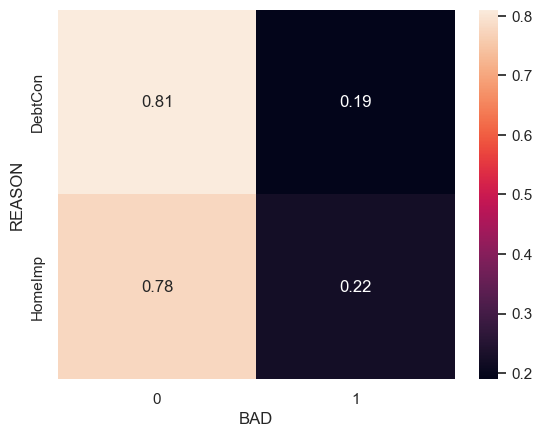

In [210]:
sns.heatmap(cont_table, annot=True)
plt.xlabel('BAD')
plt.ylabel('REASON')
plt.show()

In [211]:
chi2, pval, dof, expected = stats.chi2_contingency(cont_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")

Chi-square statistic: 0.0
P-value: 1.0


- There is no significant relationship between the REASON variable and the proportion of applicants who defaulted on their loan, indicating that the reason for a loan request is not a significant factor in determining whether or not an applicant will default.

#### Do applicants who default have a significantly different loan amount compared to those who repay their loan?

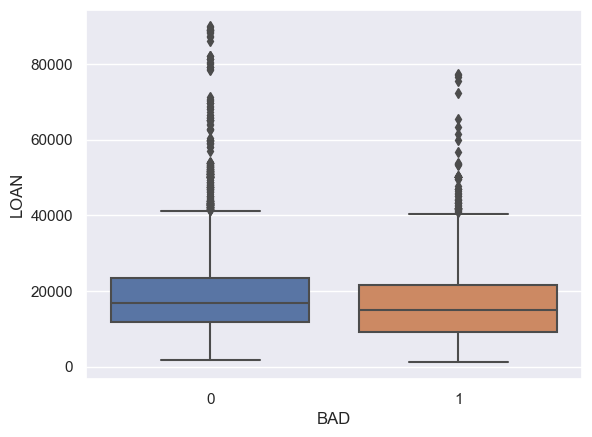

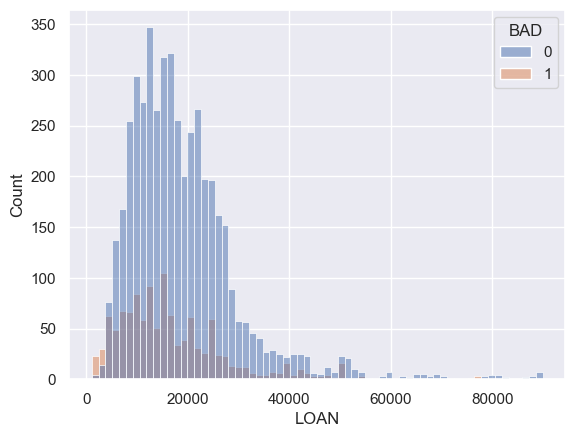

In [212]:
sns.boxplot(x='BAD', y='LOAN', data=data)
plt.show()

sns.histplot(data=data, x="LOAN", hue="BAD")
plt.show()

In [213]:
default_loan = data[data.BAD ==1]['LOAN']
repaid_loan = data[data.BAD ==0]['LOAN']

stats.ttest_ind(default_loan, repaid_loan)

Ttest_indResult(statistic=-5.81315745785895, pvalue=6.448273297751198e-09)

- There is a statistically significant difference in the mean loan amounts of those who defaulted and those who did not, with the mean loan amount for applicants who did default being lower than that of applicants who repaid their loans

#### Is there a correlation between the value of the property and the loan default rate?

          VALUE       BAD
VALUE  1.000000 -0.029954
BAD   -0.029954  1.000000


<AxesSubplot:>

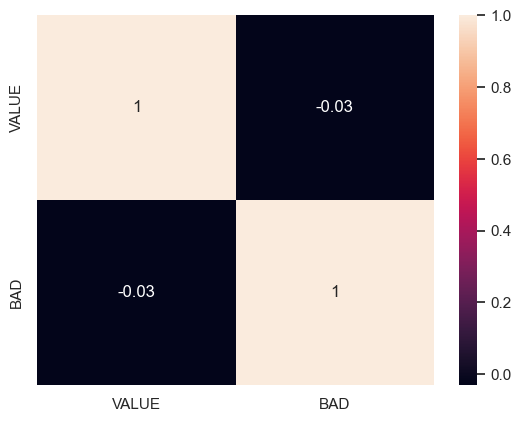

In [214]:
corr = data[['VALUE', 'BAD']].corr()
print(corr)
sns.heatmap(corr, annot=True)

- No, there is a very negligable negative correlation 

#### Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

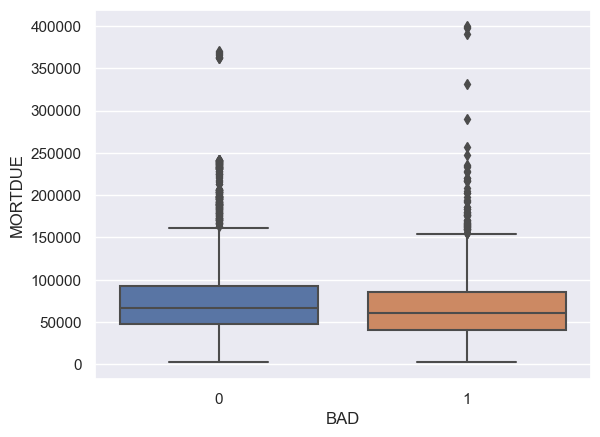

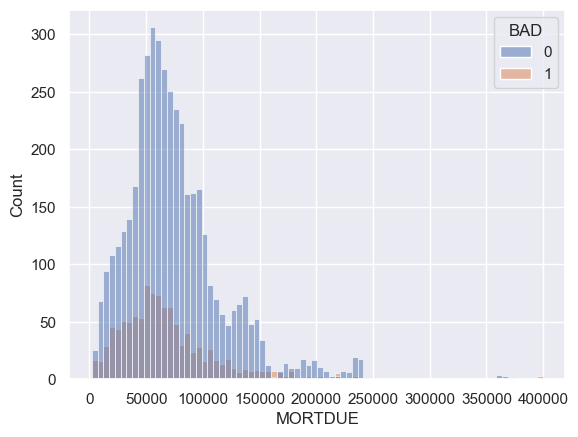

In [215]:
sns.boxplot(x='BAD', y='MORTDUE', data=data)
plt.show()

sns.histplot(data=data, x="MORTDUE", hue="BAD")
plt.show()

In [216]:
data_clean = data[['MORTDUE', 'BAD']].dropna()

default = data_clean[data_clean['BAD'] == 1]['MORTDUE']
repaid = data_clean[data_clean['BAD'] == 0]['MORTDUE']

stats.ttest_ind(default, repaid, equal_var=False)

Ttest_indResult(statistic=-3.377418509434846, pvalue=0.000749659556451092)

- There is a statistically significant difference in the mean mortgage amounts of those who defaulted and those who did not, with the mean mortgage amount for applicants who did default being lower than that of applicants who repaid their loans

### **Multivariate Analysis**

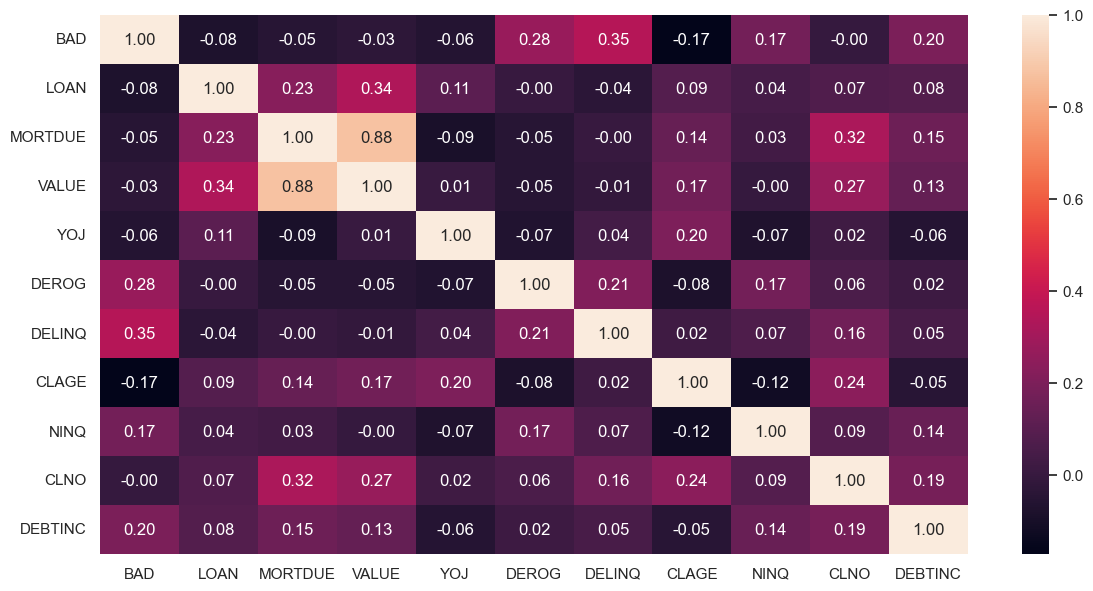

In [217]:
plt.figure(figsize = (14, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

- There is a high positive correlation (0.88) bewteen current value of the property and mortgage due and a low positive correlation between current value of the property and approved loan amount (0.34), this is about as expected and is not incredibly useful for determining deliquency.

- There is a low positive correlation (0.35) between number of deliquent credit lines and loan defaults, and a negligable positive correlation between number of derogatory reports and loan defaults (0.28). These variables could be reflected in an individual's credit score indicating that credit score would not necessarily be the best predictor of likelihood to default.

- There is a low positive correlation (0.32) between number of existing credit lines and amount due on mortgage. All other correlations are negligable.  

## Treating Outliers

In [231]:
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR  #define lower whisker
    upper = Q3 + 1.5 * IQR  #define upper Whisker
    df[col] = np.clip(df[col], lower, upper) 
    return df

def treat_outliers_all(df, col_list):

    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()

df = treat_outliers_all(df_raw,numerical_col)

## Treating Missing Values

In [232]:
#Selecting numeric columns
num_data = df.select_dtypes('number')

#Selecting string and object columns
obj_data = df.select_dtypes('object').columns.tolist()

#Filling numeric columns with median
df[num_data.columns] = num_data.fillna(num_data.median())

#Filling object columns
for column in obj_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)
    
#Fixing error with 'BAD' from treating outliers
df['BAD'] = data['BAD'].values

In [233]:
#Check to make sure missing values were filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   float64
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 605.4+ KB


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Data preparation

In [234]:
# Separating the target variable and other variables
X = df.drop(columns = 'BAD')
Y = df['BAD']

# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [236]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

In [248]:
# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.63      0.03      0.05       817

    accuracy                           0.81      4172
   macro avg       0.72      0.51      0.47      4172
weighted avg       0.77      0.81      0.73      4172



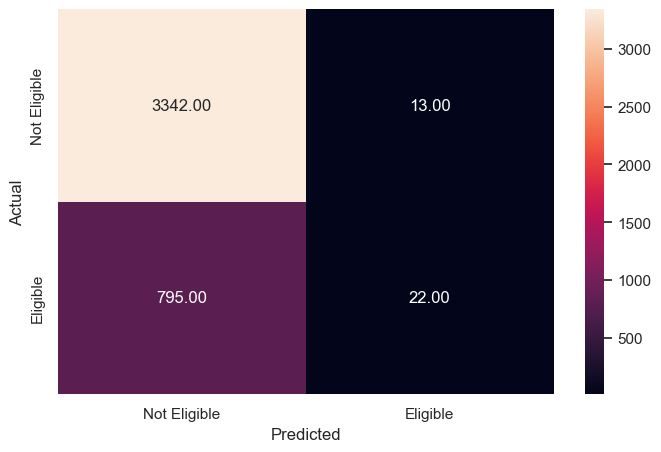

In [258]:
# Checking performance on the training data
y_pred_trainLR = logreg.predict(X_train)
metrics_score(y_train, y_pred_trainLR)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.45      0.01      0.03       372

    accuracy                           0.79      1788
   macro avg       0.62      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



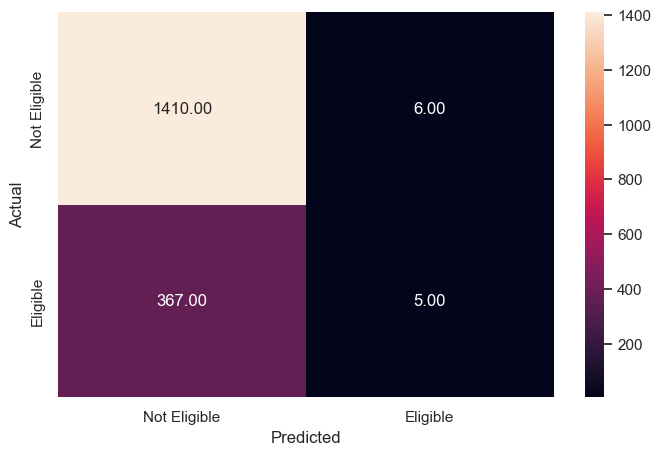

In [259]:
# Checking performance on the testing data
y_pred_testLR = logreg.predict(X_test)
metrics_score(y_test, y_pred_testLR)

In [277]:
coef = logreg.coef_
features = X.columns.tolist()

for i in range(len(features)):
    print(f'{features[i]}: {coef[0][i]}')

LOAN: -2.563763314400644e-05
MORTDUE: -5.92370370232695e-06
VALUE: -4.274079191695487e-07
YOJ: -0.02317013049179495
DEROG: 0.0
DELINQ: 0.0
CLAGE: -0.007014011160249537
NINQ: 0.025610136387603986
CLNO: 0.0017191698822881134
DEBTINC: 0.023460770666475356
REASON_HomeImp: 0.00017578448854390814
JOB_Office: -0.0036761512958909284
JOB_Other: -0.0013934186217706558
JOB_ProfExe: -0.0009513518414919797
JOB_Sales: 0.0008054953582640814
JOB_Self: 0.0013063749701195824


- The coefficients for the features LOAN, MORTDUE, VALUE, YOJ, CLAGE, and REASON_HomeImp are negative, indicating that an increase in these features leads to a decrease in the probability of loan default.
- The coefficients for the features NINQ, CLNO, DEBTINC, JOB_Sales, and JOB_Self are positive, indicating that an increase in these features leads to an increase in the probability of loan default.
- The coefficients for the features DEROG and DELINQ are zero, indicating that these features do not have an effect on the probability of loan default.
- The highest positive coefficient is for the feature NINQ, indicating that it has the strongest positive effect on the probability of loan default.
- The highest negative coefficient is for the feature YOJ, indicating that it has the strongest negative effect on the probability of loan default.

### Decision Tree

In [254]:
d_tree = DecisionTreeClassifier(random_state=7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



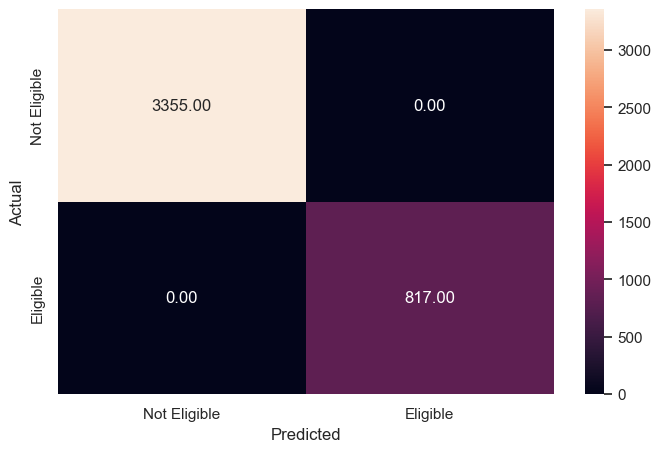

In [260]:
# Checking performance on the training data
y_pred_trainDT = d_tree.predict(X_train)
metrics_score(y_train, y_pred_trainDT)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1416
           1       0.69      0.58      0.63       372

    accuracy                           0.86      1788
   macro avg       0.79      0.75      0.77      1788
weighted avg       0.85      0.86      0.85      1788



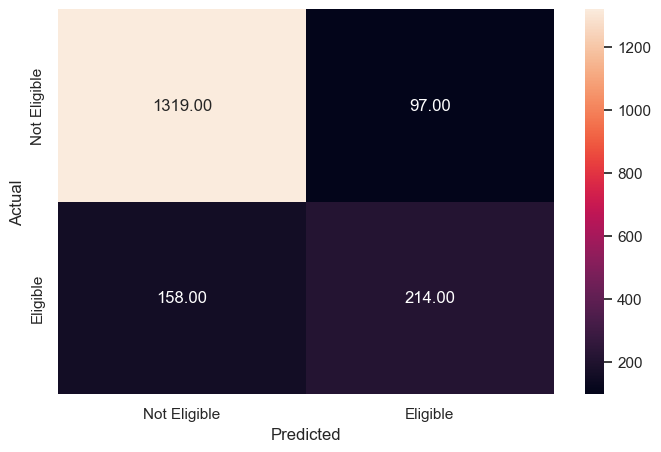

In [261]:
# Checking performance on the testing data
y_pred_testDT = d_tree.predict(X_test)
metrics_score(y_test, y_pred_testDT)

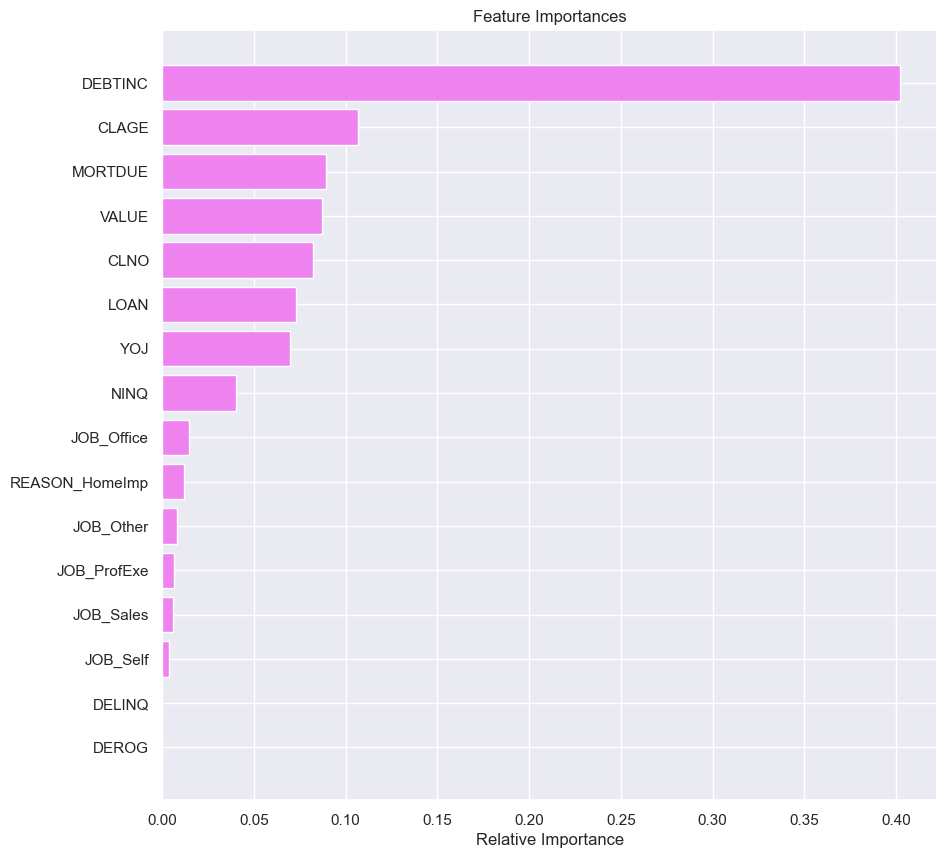

In [318]:
# Plotting the feature importance
importances = d_tree.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [315]:
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

d_tree_tuned = grid_obj.best_estimator_

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, min_samples_leaf=10, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3355
           1       0.63      0.78      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.80      4172
weighted avg       0.88      0.87      0.87      4172



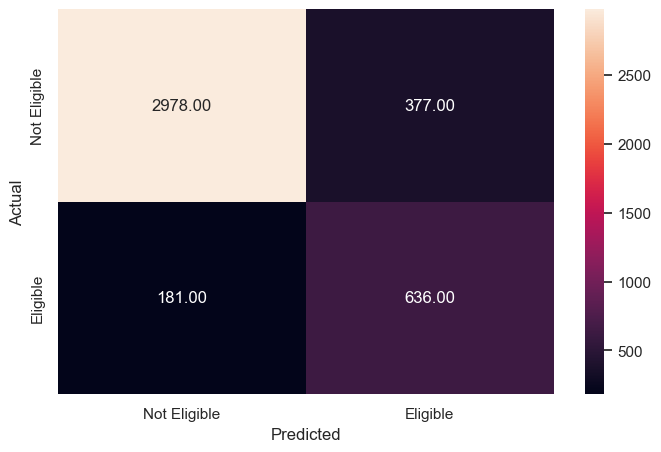

In [316]:
# Checking performance on the training data
y_pred_trainDTT = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_trainDTT)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1416
           1       0.65      0.75      0.69       372

    accuracy                           0.86      1788
   macro avg       0.79      0.82      0.80      1788
weighted avg       0.87      0.86      0.87      1788



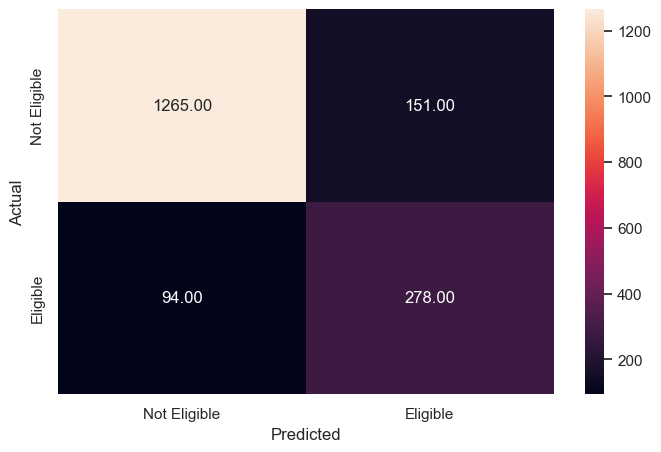

In [317]:
# Checking performance on the testing data
y_pred_testDTT = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_testDTT)

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [257]:
rfc = RandomForestClassifier(random_state=7, criterion = "entropy")

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



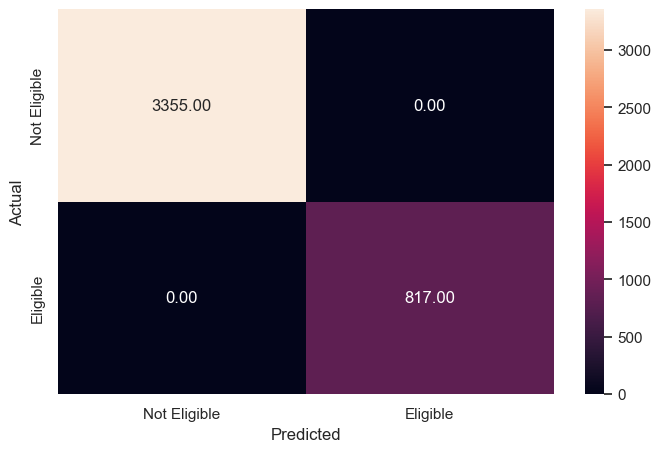

In [263]:
# Checking performance on the training data
y_pred_trainRF = rfc.predict(X_train)
metrics_score(y_train, y_pred_trainRF)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1416
           1       0.85      0.62      0.71       372

    accuracy                           0.90      1788
   macro avg       0.88      0.79      0.83      1788
weighted avg       0.89      0.90      0.89      1788



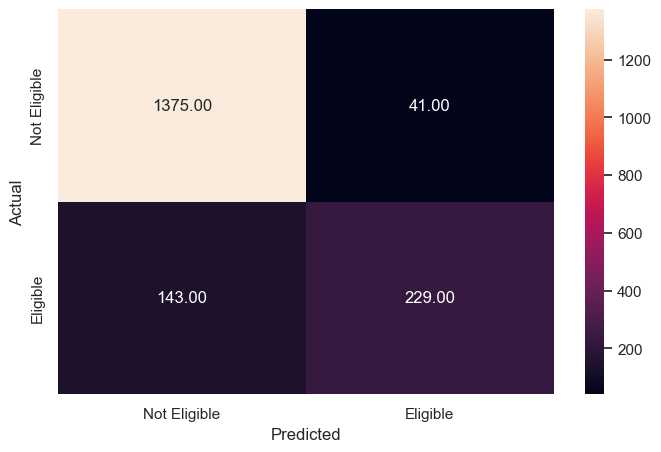

In [264]:
# Checking performance on the testing data
y_pred_testRF = rfc.predict(X_test)
metrics_score(y_test, y_pred_testRF)

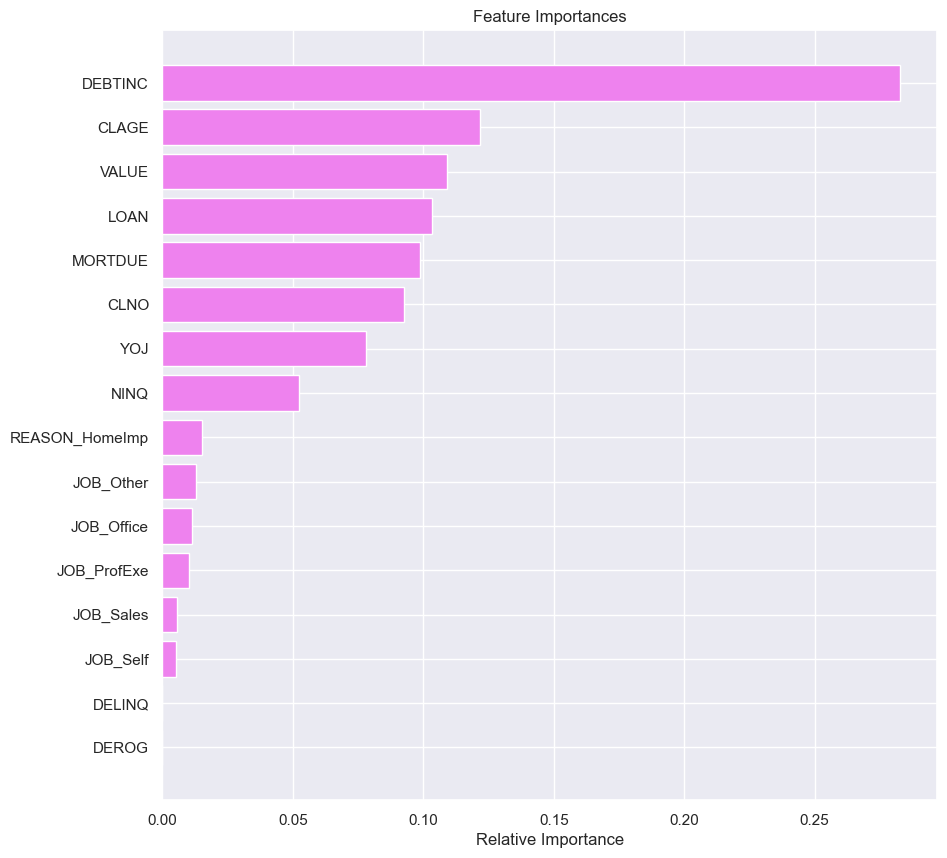

In [271]:
# Plotting the feature importance
importances = rfc.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Random Forest Classifier Hyperparameter Tuning**

In [322]:
rfcT = RandomForestClassifier(criterion = "entropy", random_state = 7)

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(rfcT, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

rfcT = grid_obj.best_estimator_

rfcT.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3355
           1       0.64      0.80      0.71       817

    accuracy                           0.87      4172
   macro avg       0.79      0.84      0.81      4172
weighted avg       0.89      0.87      0.88      4172



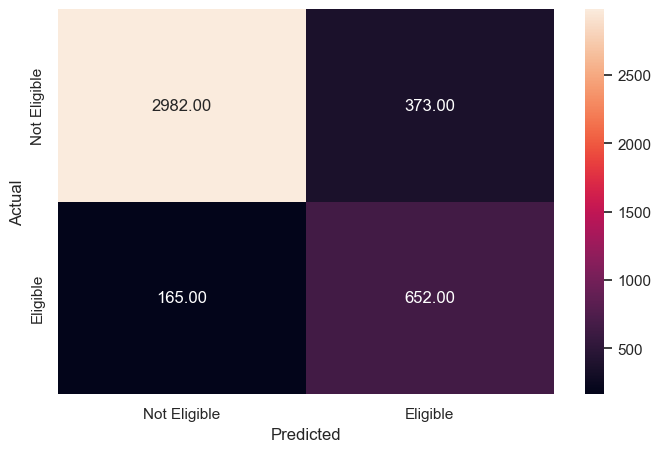

In [323]:
# Checking performance on the training data
y_pred_trainRFT = rfcT.predict(X_train)
metrics_score(y_train, y_pred_trainRFT)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1416
           1       0.64      0.73      0.68       372

    accuracy                           0.86      1788
   macro avg       0.78      0.81      0.80      1788
weighted avg       0.87      0.86      0.86      1788



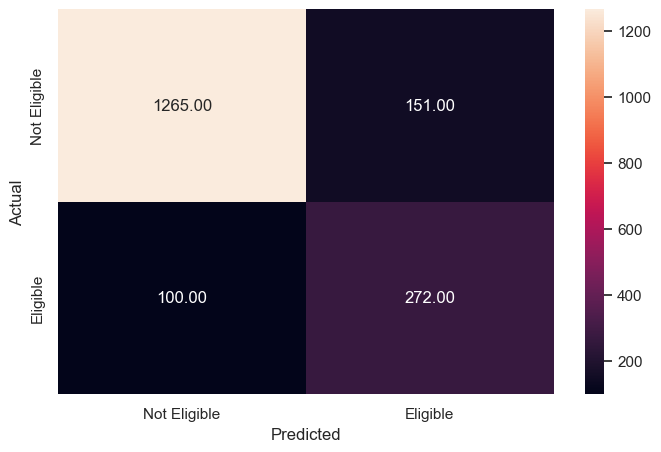

In [324]:
# Checking performance on the testing data
y_pred_testRFT = rfcT.predict(X_test)
metrics_score(y_test, y_pred_testRFT)

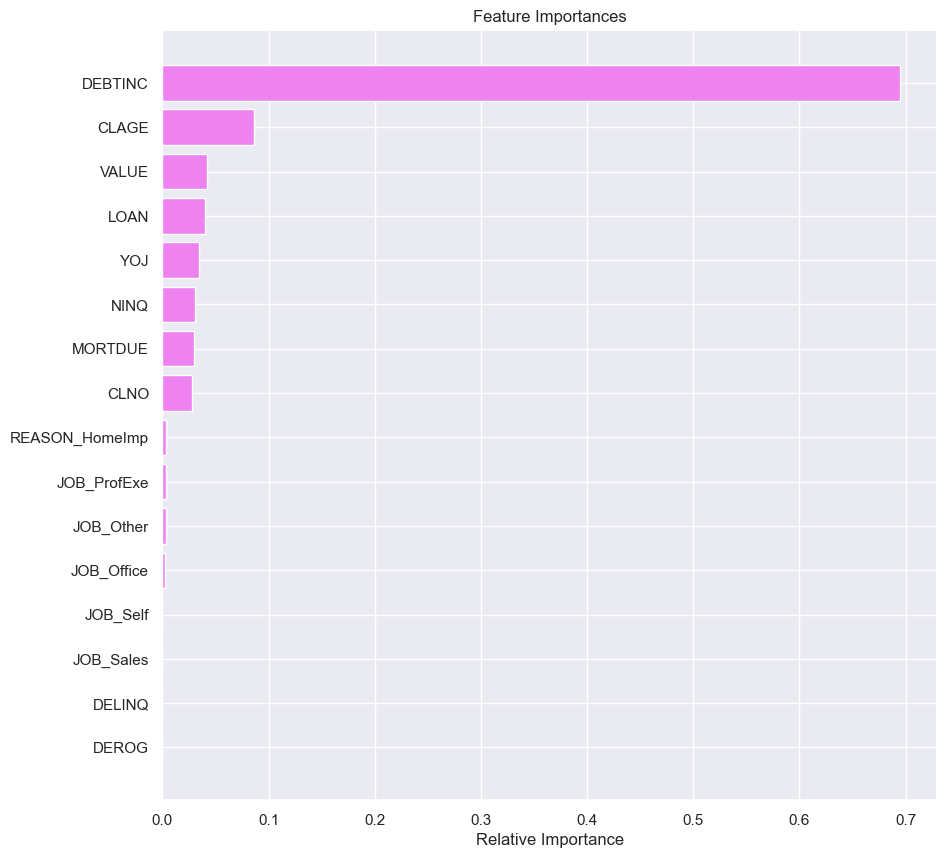

In [325]:
# Plotting the feature importance
importances = rfcT.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

---

- The random forest model with default parameters is giving the highest F1 score of 94% and the macro average of 83% on the test data.

- Looking at important variables, based on the feature importances, we can say that Debt to Income ratio is by far the largest driver of the model, this is followed by age of the oldest credit line, current value of the property, amount of loan approved, and amount due on the existing mortgage.

- This predictive variable makes sense and is important to the problem as debt to income ratio should provide the best predictor of our BAD variable, this is because knowing someones current debt and income will help us to understand whether or not they can actually afford a loan.

- We might be able to imrpove the model with more data or better tuning parameters (and more computing power) running the tuned model is very resourse intensive.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?
---
- Debt to Income ratio is a decent predictor of whether or not someone will default on a loan.
- The highest correlation with defaulting on a loan is being delinquent on other lines of credit

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?
---
- I propose to adopt a random forest model with default parameters as it has given the highest F1 score and macro average.
- In terms of business solutions I think the company giving out loans should focus more on an individuals debt to income ratio and their credit history (which will reflect delinquency or lack thereof)


### **Executive Summary**

The analysis carried out intended to create a categorization model that forecasts customers likely to fail on their home equity line of credit (HELOC) loan and to offer advice to the bank on the crucial factors to take into account when authorizing a loan. The Random Forest model with default settings produced the highest F1 score of 94% and macro average of 83%. Debt to Income ratio was found to be the largest driver of the model, followed by the age of the oldest credit line, current value of the property, amount of loan approved, and amount due on the existing mortgage. Although each of the models in this case (including our Random Forest model) had low recall meaning that this model will not be able to predict clients at risk of loan defaults correctly and thus may not be suitable for deployment in production.

### **Problem and Solution Summary**

The problem faced by the bank is the fear of defaulters, which eat up a significant chunk of their profits. Banks must use caution while approving loans for their clientele. The approval procedure for loans is complex, and the bank makes an effort to assess the applicant's creditworthiness based on a manual review of numerous application components. However, due to biases and human error, the procedure is not only time-consuming but also prone to incorrect judgment or approval. Building a machine learning model is the suggested remedy for automating the approval procedure and making it less biased and more effective. The solution will develop an empirically derived and statistically sound model for credit scoring and assist in streamlining the decision-making process for HELOC. The suggested model, a Random Forest model with default settings, is based on information gathered through the current loan underwriting procedure from recently approved applicants and managed to produce the highest F1 score of the models tested: 94% and macro average of 83%. The technology will offer a quicker, more effective, and bias-free approval procedure that will assist in lowering the risk of defaults and boosting bank profitability when it is ready for production.

### **Recommendations for implementation**

The Random Forest model with default parameters did preform the best but is still not ready for production due to low recall. The collection of more data points with more variables, investment in machine learning technologies and employee training on how to use the suggested model are the three main actionables for stakeholders to assure the model's eventual effective deployment. The advantages anticipated include accelerated approval procedures, enhanced client satisfaction, less default risk, and increased bank profitability. The key risks and challenges include the need for continuous model monitoring, the need for further training to improve the model and keep its predictions relevant and the possibility of data breaches. It may be necessary to conduct additional research on the relationship between demographic characteristics and loan defaults as well as the effect of economic conditions on loan approvals to further improve the model and prepare for deployment in production.